In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd
import numpy as np

In [197]:
# a, b in [0, 1]

def and_gate(vals):
    product = 1
    for value in vals:
        product *= value
    return product

def or_gate(vals):
    return np.max(vals)

def nand(vals):
    return 1 - and_gate(vals)

def nor(vals):
    return 1 - np.max(vals)
    
gates = [and_gate, or_gate, nand, nor]

In [210]:
class Node:
    def __init__(self, index=None):
        self.index = index
        self.state = np.random.random()
        self.gate = np.random.choice(gates)
        self.ingoing_indices = []
        self.outgoing_indices = []
        
        
class Network:
    def __init__(self, size, num_inputs=2):
        self.size = size
        self.nodes = np.array([Node(index=i) for i in range(size)])
        self.state_history = [self.yield_states()]
        self.time = 0
        
        self.randomly_connect_nodes(num_inputs=num_inputs)
        
    def randomly_connect_nodes(self, num_inputs=2):
        for node in self.nodes:
            node.ingoing_indices = [np.random.randint(0, self.size) for _ in range(num_inputs)]
            for index in node.ingoing_indices:
                self.nodes[index].outgoing_indices.append(node.index)
                
    def timestep(self):
        updated_states = []
        for i in range(self.size):
            node = self.nodes[i]
            inputs = [self.nodes[node.ingoing_indices[0]].state, self.nodes[node.ingoing_indices[1]].state]
            updated_states.append(node.gate(inputs))
            
        self.state_history.append(updated_states)
        self.time += 1
            
        for i in range(self.size):
            self.nodes[i].state = updated_states[i]
            
    def show_connections(self):
        for node in self.nodes:
            print(node.ingoing_indices, node.outgoing_indices)
    
    def show_states(self):
        for node in self.nodes:
            print(node.state)
            
    def yield_states(self):
        states = []
        for node in self.nodes:
            states.append(node.state)
        return states

In [239]:
a = Network(25, num_inputs=4)
for _ in range(25):
    a.timestep()

Text(0.5, 0, 'Time')

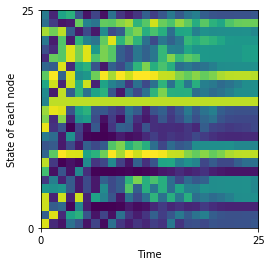

In [240]:
cm_hot = get_cmap('plasma')

history_map = np.asarray(a.state_history).transpose()
history_map = np.flip(history_map, 0)
plt.imshow(history_map, extent=[0, a.time, 0, a.size])

plt.yticks([0, a.size])
plt.ylabel("State of each node")

plt.xticks([0, a.time])
plt.xlabel("Time")

In [241]:
a.show_connections()

[20, 4, 0, 23] [0, 1, 9, 10, 15, 16, 18, 21, 21]
[0, 24, 14, 4] [12, 13, 14, 17, 18, 23]
[17, 10, 12, 19] [8]
[3, 21, 15, 23] [3, 16, 24]
[20, 4, 23, 18] [0, 1, 4, 17]
[16, 19, 7, 6] [6, 18]
[19, 10, 7, 5] [5]
[15, 23, 15, 9] [5, 6, 14, 15, 19, 20]
[17, 18, 16, 2] []
[17, 21, 0, 24] [7, 11, 12, 19, 19, 20, 22]
[22, 24, 12, 0] [2, 6, 24]
[16, 9, 14, 18] [13, 13]
[1, 14, 9, 22] [2, 10, 13, 21, 23]
[11, 1, 11, 12] [15, 23]
[14, 7, 22, 1] [1, 11, 12, 14, 19, 20]
[0, 21, 13, 7] [3, 7, 7]
[3, 24, 0, 21] [5, 8, 11]
[19, 1, 19, 4] [2, 8, 9, 20, 22]
[5, 1, 22, 0] [4, 8, 11, 21]
[9, 9, 14, 7] [2, 5, 6, 17, 17, 23, 24]
[7, 9, 14, 17] [0, 4, 22, 22]
[0, 18, 12, 0] [3, 9, 15, 16]
[20, 20, 17, 9] [10, 12, 14, 18, 24]
[13, 12, 19, 1] [0, 3, 4, 7]
[19, 22, 10, 3] [1, 9, 10, 16]
